<a href="https://colab.research.google.com/github/Wondupper/Regression_Diamonds/blob/main/%D0%91%D1%80%D0%B8%D0%BB%D0%BB%D0%B8%D0%B0%D0%BD%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


3) Проведите первичное статистическое исследование количественных (минимальный, максимальный значения столбцов, медиана и т.п.) и категориальных признаков.

In [ ]:
data = pd.read_csv("diamonds.csv", delimiter = ",")

In [ ]:
numeric = [col for col in data.columns if data[col].dtypes in ['int64', 'float64']]
num_data = data[numeric]
num_data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
categorial = [col for col in data.columns if data[col].dtypes == 'object']
cat_data = data[categorial]
cat_data.describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


4) Определите наличие пропусков и дубликатов в данных. При необходимости заполните пропуски и удалите дубликаты.

In [ ]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop(["Unnamed: 0", "x", "y", "z"], axis=1, inplace=True)

In [ ]:
data.duplicated().sum()

803

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

5) Визуализируйте распределение некоторых признаков.

<Axes: xlabel='price', ylabel='Count'>

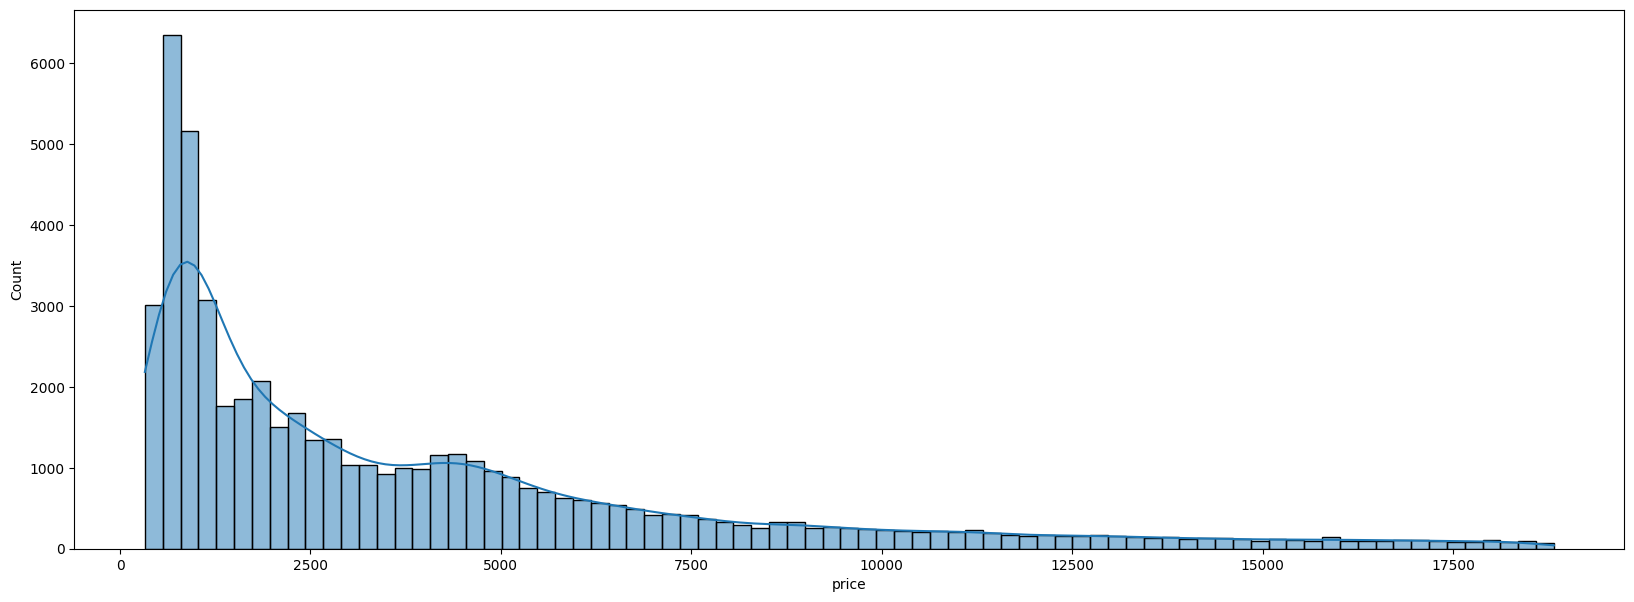

In [ ]:
plt.figure(figsize = (20,7))
sns.histplot(data = data, x = 'price', kde = True)

<Axes: xlabel='carat', ylabel='Count'>

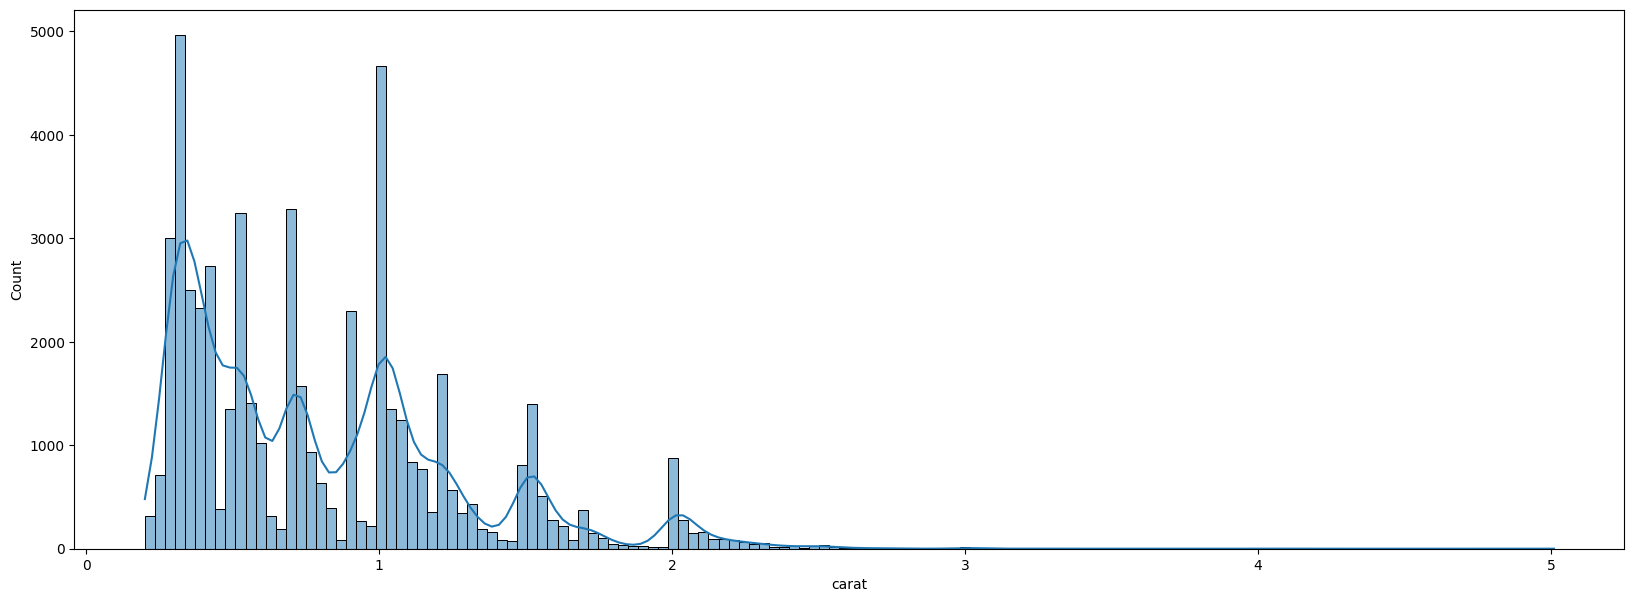

In [ ]:
plt.figure(figsize = (20,7))
sns.histplot(data = data, x = 'carat', kde = True)

(array([ 9605.,  5383.,     0.,  2797.,     0.,  8199.,  9397.,     0.,
        11108.,  6648.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

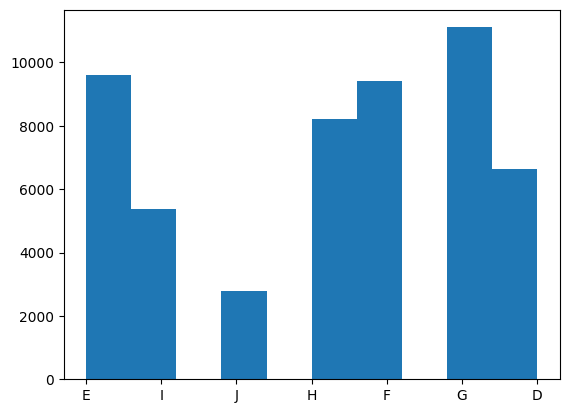

In [ ]:
plt.hist(data['color'])

 6) Проверьте наличие отклонений и аномалий в распределении значений признаков. При необходимости удалите их.

Для удаления выбросов будем использовать z-оценку

In [ ]:
def z_score(num,nazv, threshold=3):
    out = []
    mean = np.mean(num)
    std = np.std(num)
    data_copy = data.copy()
    while True:
        z_scores = (num - mean) / std
        outliers = np.abs(z_scores) > threshold
        if not np.any(outliers):
            break
        out.append(num[outliers].values)
        data_copy = data_copy.drop(data_copy[outliers].index)
        num = data_copy[nazv]
        mean = np.mean(num)
        std = np.std(num)
    return data_copy

num1 = data['carat']
data_copy_cleaned = z_score(num1, 'carat')
num2 = data['depth']
data_copy_cleaned = z_score(num2, 'depth')
num3 = data['table']
data_copy_cleaned = z_score(num3, 'table')
num4 = data['price']
data_copy_cleaned = z_score(num4, 'price')

<Axes: xlabel='carat', ylabel='price'>

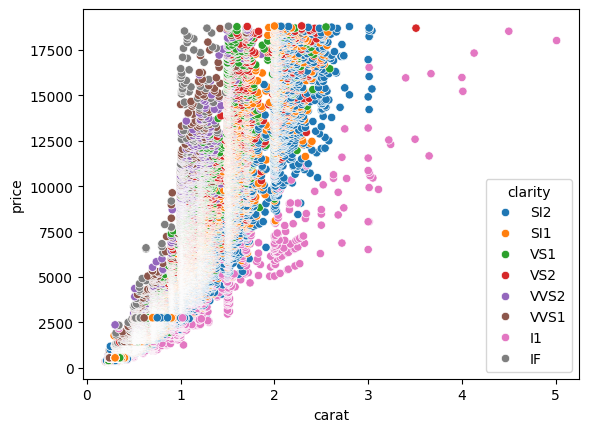

In [ ]:
sns.scatterplot(data = data, x = 'carat', y = 'price', hue = 'clarity')

<Axes: xlabel='carat', ylabel='price'>

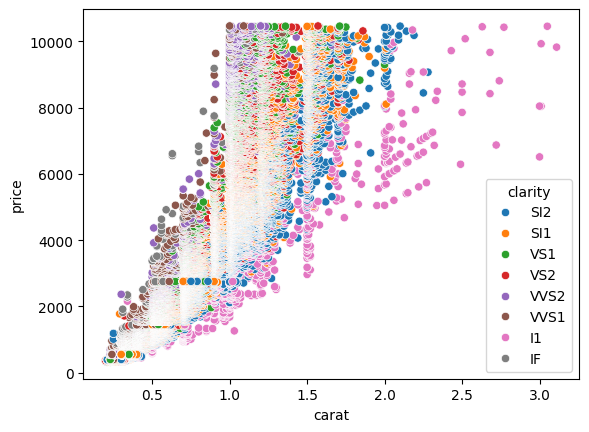

In [ ]:
sns.scatterplot(data = data_copy_cleaned, x = 'carat', y = 'price', hue = 'clarity')

7) Рассмотрите категориальные признаки, выберите наиболее подходящий способ кодирования для каждого.

Для кодирования будет использоваться метод OrdinalEncoder из библиотеки sklearn

In [ ]:
data_OneEncoding = data_copy_cleaned
enconder = OrdinalEncoder()
data_OneEncoding[["cut","color","clarity"]] = enconder.fit_transform(data_OneEncoding[["cut","color","clarity"]])

In [ ]:
data_OneEncoding

,carat,cut,color,clarity,depth,table,price
0,0.23,2.0,1.0,3.0,61.5,55.0,326
1,0.21,3.0,1.0,2.0,59.8,61.0,326
2,0.23,1.0,1.0,4.0,56.9,65.0,327
3,0.29,3.0,5.0,5.0,62.4,58.0,334
4,0.31,1.0,6.0,3.0,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2.0,60.8,57.0,2757
53936,0.72,1.0,0.0,2.0,63.1,55.0,2757
53937,0.70,4.0,0.0,2.0,62.8,60.0,2757
53938,0.86,3.0,4.0,3.0,61.0,58.0,2757


8) Визуализируйте зависимости в признаках.

<Axes: xlabel='carat', ylabel='price'>

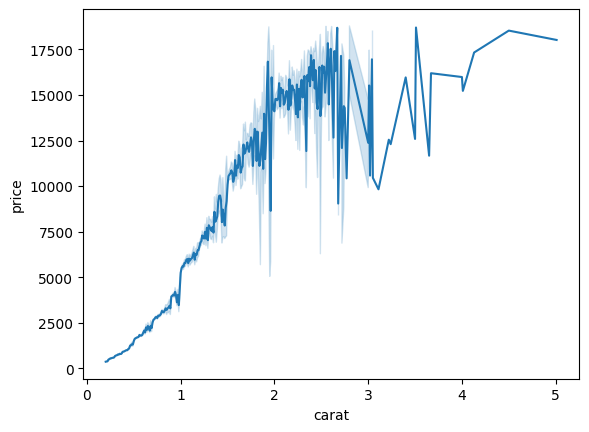

In [ ]:
sns.lineplot(data=data, x='carat', y='price')

<Axes: xlabel='color', ylabel='price'>

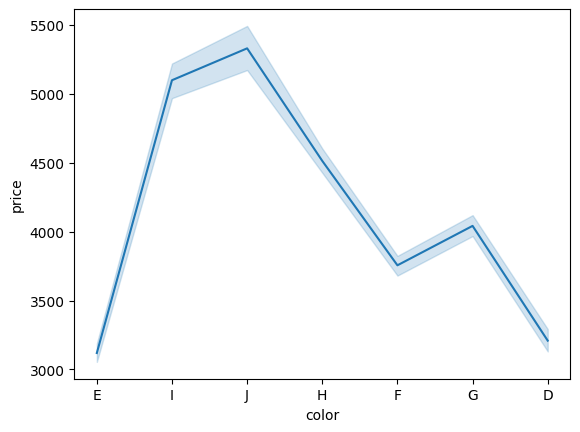

In [ ]:
sns.lineplot(data=data, x='color', y='price')

<Axes: xlabel='clarity', ylabel='price'>

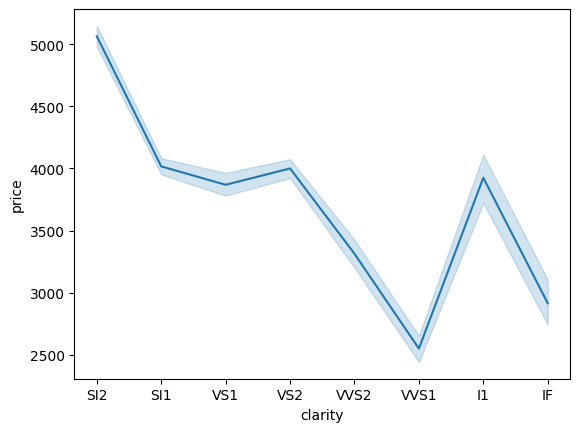

In [ ]:
sns.lineplot(data=data, x='clarity', y='price')

<Axes: xlabel='clarity', ylabel='color'>

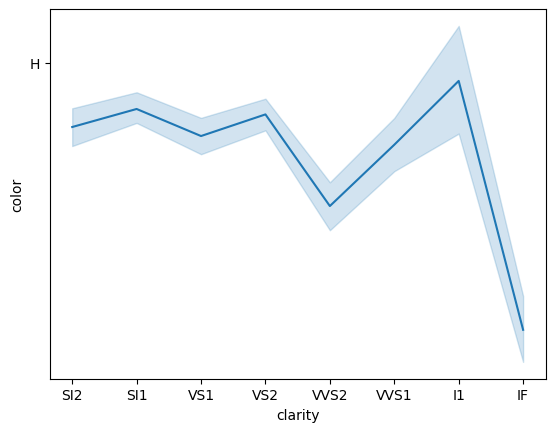

In [ ]:
sns.lineplot(data=data, x='clarity', y='color')

<Axes: xlabel='carat', ylabel='color'>

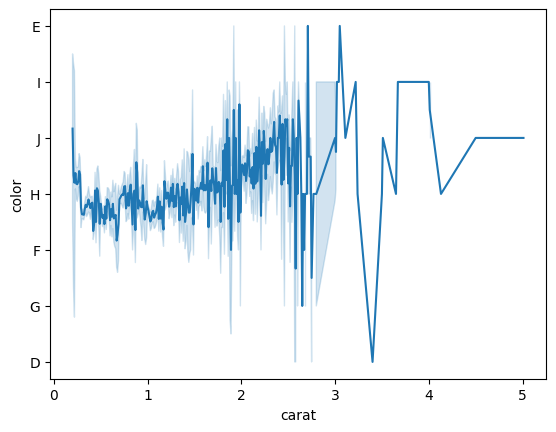

In [ ]:
sns.lineplot(data=data, x='carat', y='color')

9) Постройте "тепловую карту" зависимости признаков.

<ipython-input-26-06eafba9b390>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

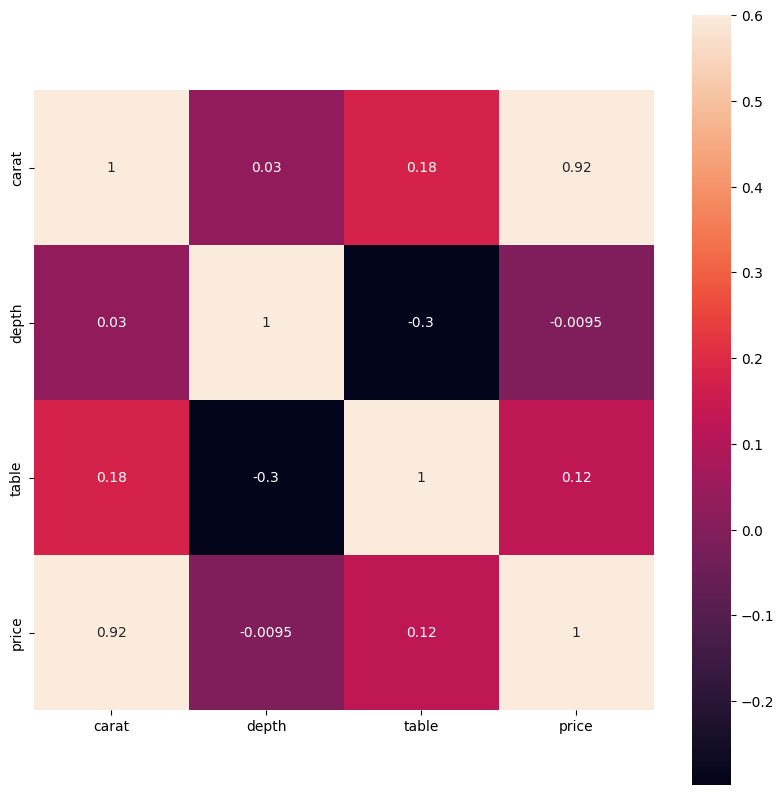

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmax = 0.6, square = True, annot = True)

10) Нормализуйте признаки.

Для нормализации будет использоваться MinMaxScaler

In [ ]:
scaler_mm = MinMaxScaler()
data_OneEncoding[['carat', 'cut', 'color', 'clarity', 'depth','table', 'price']] = scaler_mm.fit_transform(data_OneEncoding[['carat', 'cut', 'color', 'clarity', 'depth','table','price']])
data_OneEncoding.head()

,carat,cut,color,clarity,depth,table,price
0,0.010309,0.50,0.166667,0.428571,0.513889,0.333333,0.000000
1,0.003436,0.75,0.166667,0.285714,0.466667,0.500000,0.000000
2,0.010309,0.25,0.166667,0.571429,0.386111,0.611111,0.000099
3,0.030928,0.75,0.833333,0.714286,0.538889,0.416667,0.000789
4,0.037801,0.25,1.000000,0.428571,0.563889,0.416667,0.000888


11) Постройте линейную регрессию. Оцените результат с помощью метрик r2 и MSE.

[0.46646468]
0.05221786665789141
r^2: 0.8431411126230781
MSE: 0.0024476964582178518


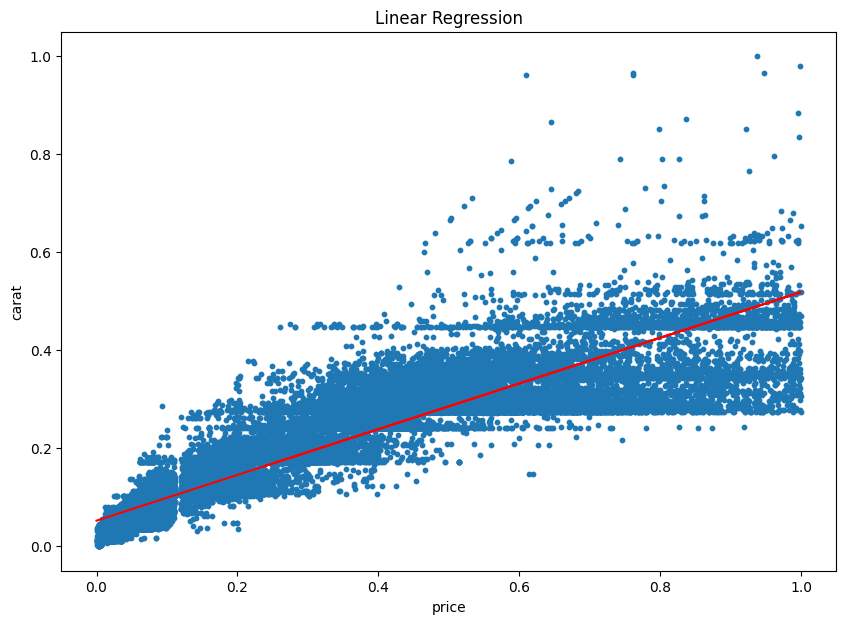

In [ ]:
regressor = LinearRegression()

x_data_OneEncoding = np.array(data_OneEncoding['price']).reshape(-1, 1)
y_data_OneEncoding = np.array(data_OneEncoding['carat'])

start_time = time.perf_counter()
regressor.fit(x_data_OneEncoding, y_data_OneEncoding)
end_time = time.perf_counter()

y_pred_data_OneEncoding = regressor.predict(x_data_OneEncoding)
mse = mean_squared_error(y_data_OneEncoding, y_pred_data_OneEncoding)

print(regressor.coef_)
print(regressor.intercept_)
print("r^2:", regressor.score(x_data_OneEncoding, y_data_OneEncoding))
print("MSE:", mse)

#Добавить на скорость обучения модели

plt.figure(figsize = (10,7))
plt.scatter(x_data_OneEncoding, y_data_OneEncoding, s = 10)
plt.title('Linear Regression')
plt.xlabel('price')
plt.ylabel('carat')
plt.plot(x_data_OneEncoding, regressor.predict(x_data_OneEncoding), color = 'red')

12) Постройте полиномиальную регрессию. Сравните результаты с предыдущими.

[[0.00000000e+00]
 [0.00000000e+00]
 [9.86485153e-05]
 ...
 [2.39814541e-01]
 [2.39814541e-01]
 [2.39814541e-01]]
[0.01030928 0.00343643 0.01030928 ... 0.17182131 0.22680412 0.18900344]


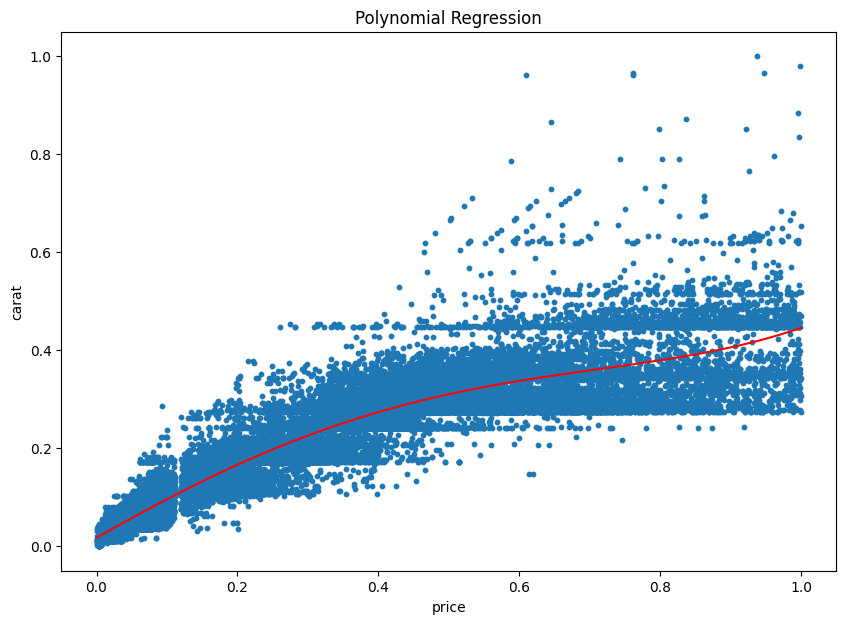

In [ ]:
X_one_encoding = np.array(data_OneEncoding['price']).reshape(-1,1)
Y_one_encoding = np.array(data_OneEncoding['carat'])
print(X_one_encoding)
print(Y_one_encoding)

regressor = LinearRegression()
regressor.fit(X_one_encoding, Y_one_encoding)

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_one_encoding)

poly.fit(X_poly, Y_one_encoding)

regressor2 = LinearRegression()
regressor2.fit(X_poly, Y_one_encoding)

plt.figure(figsize = (10,7))
plt.scatter(X_one_encoding, Y_one_encoding, s = 10)
plt.title('Polynomial Regression')
plt.xlabel('price')
plt.ylabel('carat')
X_new = np.linspace(X_one_encoding.min(), X_one_encoding.max(), 100)
X_new_poly = poly.fit_transform(X_new.reshape(-1, 1))
Y_new = regressor2.predict(X_new_poly)

plt.plot(X_new, Y_new, color='r')
plt.show()

13) Сравните результаты при различных вариантах работы с категориальными признаками: удаление, кодирование OrdinalEncoder, OneHotEncoding. Объясните полученные результаты.

Проделаем пункты 10-12 для OneHotEncoder

In [ ]:
data_OneHotEncoding = data_copy_cleaned
data_OneHotEncoding = pd.get_dummies(data_OneHotEncoding, columns=["cut","color","clarity"])

In [ ]:
scaler_mm = MinMaxScaler()
data_OneHotEncoding[['carat', 'depth','table', 'price']] = scaler_mm.fit_transform(data_OneHotEncoding[['carat', 'depth','table','price']])
data_OneHotEncoding.head()

,carat,depth,table,price,cut_0.0,cut_0.25,cut_0.5,cut_0.75,cut_1.0,color_0.0,...,color_0.8333333333333333,color_1.0,clarity_0.0,clarity_0.14285714285714285,clarity_0.2857142857142857,clarity_0.42857142857142855,clarity_0.5714285714285714,clarity_0.7142857142857142,clarity_0.8571428571428571,clarity_1.0
0,0.010309,0.513889,0.333333,0.000000,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.003436,0.466667,0.500000,0.000000,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.010309,0.386111,0.611111,0.000099,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.030928,0.538889,0.416667,0.000789,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.037801,0.563889,0.416667,0.000888,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


[0.46646468]
0.052217866657891354
r^2: 0.8431411126230781
MSE: 0.002447696458217851


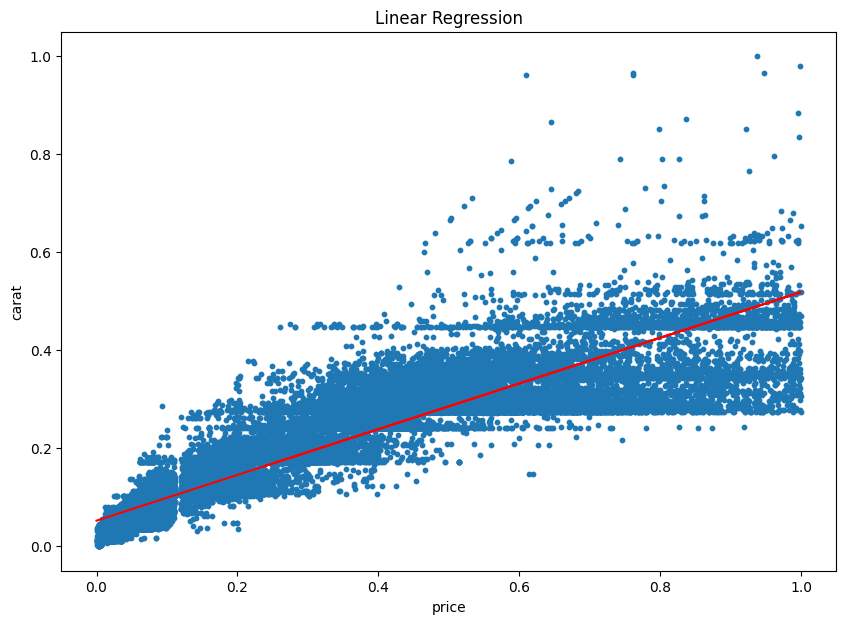

In [ ]:
regressor = LinearRegression()

x_data_OneHotEncoding = np.array(data_OneHotEncoding['price']).reshape(-1, 1)
y_data_OneHotEncoding = np.array(data_OneHotEncoding['carat'])

regressor.fit(x_data_OneHotEncoding, y_data_OneHotEncoding)

y_pred_data_OneHotEncoding = regressor.predict(x_data_OneHotEncoding)
mse = mean_squared_error(y_data_OneHotEncoding, y_pred_data_OneHotEncoding)

print(regressor.coef_)
print(regressor.intercept_)
print("r^2:", regressor.score(x_data_OneHotEncoding, y_data_OneHotEncoding))
print("MSE:", mse)

plt.figure(figsize = (10,7))
plt.scatter(x_data_OneHotEncoding, y_data_OneHotEncoding, s = 10)
plt.title('Linear Regression')
plt.xlabel('price')
plt.ylabel('carat')
plt.plot(x_data_OneHotEncoding, regressor.predict(x_data_OneHotEncoding), color = 'red')

[[0.00000000e+00]
 [0.00000000e+00]
 [9.86485153e-05]
 ...
 [2.39814541e-01]
 [2.39814541e-01]
 [2.39814541e-01]]
[0.01030928 0.00343643 0.01030928 ... 0.17182131 0.22680412 0.18900344]


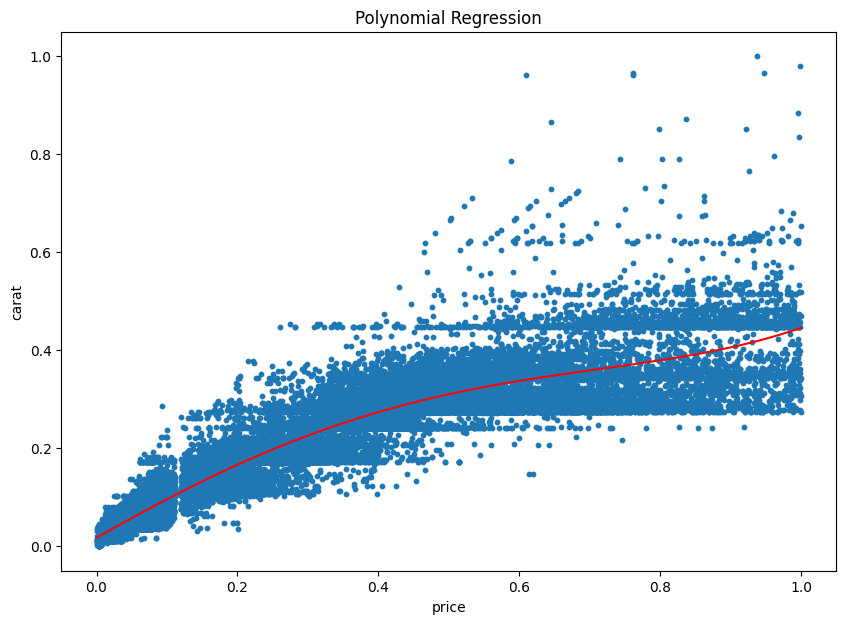

In [ ]:
x_data_OneHotEncoding = np.array(data_OneHotEncoding['price']).reshape(-1,1)
y_data_OneHotEncoding = np.array(data_OneHotEncoding['carat'])
print(x_data_OneHotEncoding)
print(y_data_OneHotEncoding)

regressor = LinearRegression()
regressor.fit(x_data_OneHotEncoding, y_data_OneHotEncoding)

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_data_OneHotEncoding)

poly.fit(X_poly, y_data_OneHotEncoding)

regressor2 = LinearRegression()
regressor2.fit(X_poly, y_data_OneHotEncoding)

plt.figure(figsize = (10,7))
plt.scatter(x_data_OneHotEncoding, y_data_OneHotEncoding, s = 10)
plt.title('Polynomial Regression')
plt.xlabel('price')
plt.ylabel('carat')
X_new = np.linspace(x_data_OneHotEncoding.min(), x_data_OneHotEncoding.max(), 100)
X_new_poly = poly.fit_transform(X_new.reshape(-1, 1))
Y_new = regressor2.predict(X_new_poly)

plt.plot(X_new, Y_new, color='r')
plt.show()

14) Используйте другой тип регрессии (на ваш выбор) и сравните результаты.

Будет использована логистическая регрессия

[[0.00000000e+00]
 [0.00000000e+00]
 [9.86485153e-05]
 ...
 [2.39814541e-01]
 [2.39814541e-01]
 [2.39814541e-01]]

[0.01030928 0.00343643 0.01030928 ... 0.17182131 0.22680412 0.18900344]

[0 0 0 ... 1 1 1]


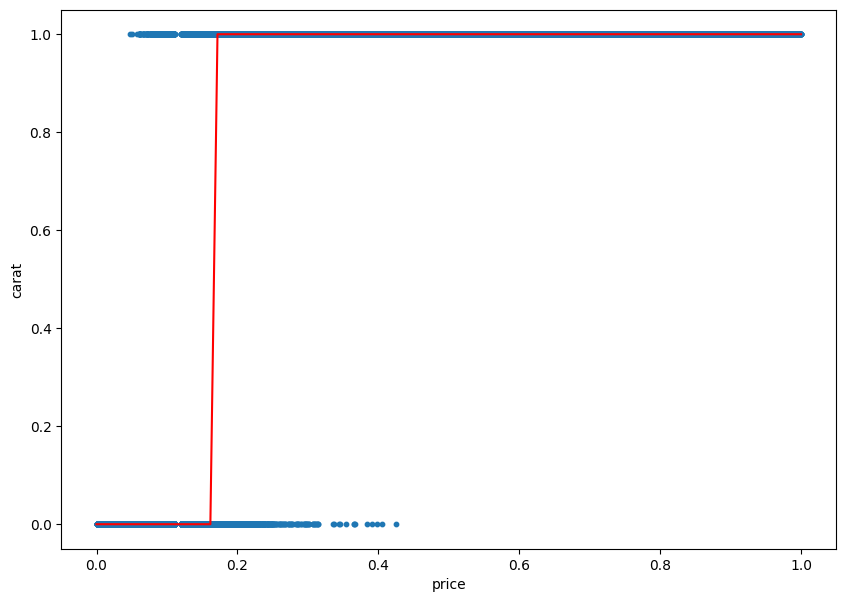

In [ ]:
plt.figure(figsize = (10,7))

X_one_encoding = np.array(data_OneEncoding['price']).reshape(-1,1)
Y_one_encoding = np.array(data_OneEncoding['carat'])
print(X_one_encoding)
print()
print(Y_one_encoding)

Y_one_encoding = np.where(Y_one_encoding > 0.131234, 1, 0)
print()
print(Y_one_encoding)

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_one_encoding)

logist = LogisticRegression()
logist.fit(X_poly, Y_one_encoding)

plt.scatter(X_one_encoding, Y_one_encoding, s = 10)
plt.xlabel('price')
plt.ylabel('carat')

X_new = np.linspace(X_one_encoding.min(), X_one_encoding.max(), 100)
X_new_poly = poly.fit_transform(X_new.reshape(-1,1))
Y_new = logist.predict(X_new_poly)
plt.plot(X_new, Y_new, color = 'r')
plt.show()